<h1>Nama : Putra Dwi Wira Gardha Yuniahans</h1><br>
<h1>Kampus : Universitas Pembangunan Nasional Veteran Jawatimur</h1>

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0a51b3edd802d2653104ddee25d896dd1f36cd92827a171c55e05db463f79318
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1pm9x4P1MQ-5y_u2U_zecdifI8fY_tpyh'
output_dir = '/content'
file = wget.download(url, out=output_dir)

In [4]:
!unzip /content/DATASET.zip

Archive:  /content/DATASET.zip
   creating: DATASET/
  inflating: DATASET/package_tourism.csv  
  inflating: DATASET/tourism_rating.csv  
  inflating: DATASET/tourism_with_id.csv  
  inflating: DATASET/user.csv        


<h1>Data Understanding</h1>

In [5]:
wisata = pd.read_csv('/content/DATASET/tourism_with_id.csv')
user = pd.read_csv('/content/DATASET/user.csv')
rating_wisata = pd.read_csv('/content/DATASET/tourism_rating.csv')

Total Data Keseluruhan Berdasarkan Place_Id<br>
nantinya project ini hanya merekomendasikan wista dari kote tertentu saja

In [56]:
print('Jumlah Wisata :', len(wisata.Place_Id.unique()))
print('Jumlah Data User :', len(user.User_Id.unique()))
print('Jumlah Data Rating Wisata :', len(rating_wisata.Place_Id.unique()))
print('=============================')
print('Jumlah Semua Data Wisata :', len(wisata))
print('Jumlah Semua Data User :', len(user))
print('Jumlah Semua Data Rating Wisata :', len(rating_wisata))

Jumlah Wisata : 437
Jumlah Data User : 300
Jumlah Data Rating Wisata : 437
Jumlah Semua Data Wisata : 437
Jumlah Semua Data User : 300
Jumlah Semua Data Rating Wisata : 10000


<h1>Exploratory Data</h1>

Data Wisata

In [7]:
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [8]:
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [9]:
print('Banyak Data :', len(wisata.Place_Id.unique()))
print('Nama Kota :', wisata.City.unique())

Banyak Data : 437
Nama Kota : ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


Pada table data diatas terdapat kolom yang tidak diperlukan, seperti unamed11, dan unamed12. maka langkah selanjutnya menghapus kolom tersebut dari database.

In [10]:
wisata = wisata.drop('Unnamed: 11', axis=1)
wisata = wisata.drop('Unnamed: 12', axis=1)

In [11]:
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


            jumlah Sebaran Data Wisata /kota  persentase
Yogyakarta                               126        28.8
Bandung                                  124        28.4
Jakarta                                   84        19.2
Semarang                                  57        13.0
Surabaya                                  46        10.5


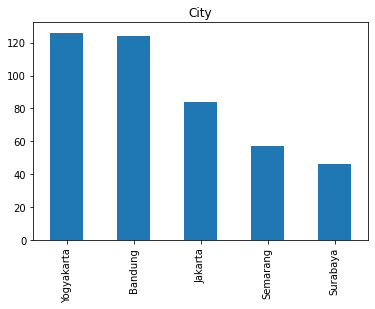

In [12]:
feature = 'City'
count = wisata[feature].value_counts()
percent = 100*wisata[feature].value_counts(normalize=True)
city = pd.DataFrame({'jumlah Sebaran Data Wisata /kota':count, 'persentase':percent.round(1)})
print(city)
count.plot(kind='bar', title=feature);

Data User

In [13]:
print(user.shape)

(300, 3)


In [14]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Data Rating Wisata

In [15]:
rating_wisata.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [16]:
rating_wisata.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [17]:
print('Jumlah User :', len(rating_wisata.User_Id.unique()))
print('Jumlah Wisata :', len(rating_wisata.Place_Id.unique()))
print('Jumlah Rating :', len(rating_wisata))

Jumlah User : 300
Jumlah Wisata : 437
Jumlah Rating : 10000


<h1>Data Preprocesing</h1>

Seperti tujuan dari proyek ini yaitu merekomendasi wisata yang berada di Surabaya, maka pada dataset wisata hanya menampilkan data wisata yang berada di surabaya

In [18]:
wisata_surabaya = wisata[wisata['City']=='Surabaya']
wisata_surabaya

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
391,392,Ekowisata Mangrove Wonorejo,Hutan Wisata Mangrove Surabaya merupakan wisat...,Cagar Alam,Surabaya,0,4.3,60.0,"{'lat': -7.308648199999999, 'lng': 112.8216622}",-7.308648,112.821662
392,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560
393,394,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45.0,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523
394,395,Taman Prestasi,Taman Prestasi Surabaya merupakan salah satu t...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.2614722, 'lng': 112.7428284}",-7.261472,112.742828
395,396,Monumen Kapal Selam,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Budaya,Surabaya,15000,4.4,30.0,"{'lat': -7.2654304, 'lng': 112.7503052}",-7.265430,112.750305
396,397,Taman Kunang-Kunang,Taman Kunang – Kunang di Surabaya ini mempunya...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.318220199999999, 'lng': 112.7842405}",-7.318220,112.784240
397,398,Taman Buah Surabaya,Wisata Taman Buah Undaan di Surabaya adalah sa...,Taman Hiburan,Surabaya,0,4.1,30.0,"{'lat': -7.266213899999999, 'lng': 112.795281}",-7.266214,112.795281
398,399,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0,4.5,20.0,"{'lat': -7.3275604, 'lng': 112.7312242}",-7.327560,112.731224
399,400,Hutan Bambu Keputih,Surabaya menjadi kota metropolitan kedua setel...,Cagar Alam,Surabaya,0,4.3,25.0,"{'lat': -7.294190899999999, 'lng': 112.8017238}",-7.294191,112.801724
400,401,Taman Keputran,"Ntah, mengapa nama taman ini disebut dengan ta...",Taman Hiburan,Surabaya,0,4.3,NaN,"{'lat': -7.2732153, 'lng': 112.744102}",-7.273215,112.744102


Selanjutnya pada data rating_wisata juga ditampilkan hanya rating wisata di Surabaya

In [19]:
rating_wisata_surabaya = pd.merge(rating_wisata, wisata_surabaya[['Place_Id']], how='right', on='Place_Id')
rating_wisata_surabaya

,User_Id,Place_Id,Place_Ratings
0,25,392,4
1,44,392,3
2,108,392,5
3,119,392,3
4,125,392,5
...,...,...,...
1045,284,437,5
1046,288,437,1
1047,288,437,4
1048,297,437,4


Selanjutnya pada dataset user juga akan ditampilkan hanya user yang memberi rating wisata di Surabaya

In [20]:
user_surabaya = pd.merge(user, rating_wisata_surabaya[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user_surabaya

,User_Id,Location,Age
16,1,"Semarang, Jawa Tengah",20
334,2,"Bekasi, Jawa Barat",21
641,3,"Cirebon, Jawa Barat",23
305,4,"Bekasi, Jawa Barat",21
50,5,"Lampung, Sumatera Selatan",20
...,...,...,...
333,296,"Lampung, Sumatera Selatan",31
14,297,"Palembang, Sumatera Selatan",39
15,298,"Bogor, Jawa Barat",38
240,299,"Sragen, Jawa Tengah",27


Menggabungkan Data dengan Fitur nama Wisata

In [21]:
all_wisata_surabaya = rating_wisata_surabaya
all_wisata_surabaya

,User_Id,Place_Id,Place_Ratings
0,25,392,4
1,44,392,3
2,108,392,5
3,119,392,3
4,125,392,5
...,...,...,...
1045,284,437,5
1046,288,437,1
1047,288,437,4
1048,297,437,4


In [22]:
all_wisata_surabaya = pd.merge(all_wisata_surabaya, 
                               wisata_surabaya[['Place_Id','Place_Name','Category']], 
                               on='Place_Id', 
                               how='left')
all_wisata_surabaya 

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,25,392,4,Ekowisata Mangrove Wonorejo,Cagar Alam
1,44,392,3,Ekowisata Mangrove Wonorejo,Cagar Alam
2,108,392,5,Ekowisata Mangrove Wonorejo,Cagar Alam
3,119,392,3,Ekowisata Mangrove Wonorejo,Cagar Alam
4,125,392,5,Ekowisata Mangrove Wonorejo,Cagar Alam
...,...,...,...,...,...
1045,284,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1046,288,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1047,288,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1048,297,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah


<h1>Data Preparation</h1>

In [23]:
all_wisata_surabaya.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Category         0
dtype: int64

In [24]:
print('Banyak Data Wisata Surabaya :', len(all_wisata_surabaya.Place_Name.unique()))
print('Wisata Surabaya :', all_wisata_surabaya.Place_Name.unique())

Banyak Data Wisata Surabaya : 46
Wisata Surabaya : ['Ekowisata Mangrove Wonorejo' 'Taman Harmoni Keputih' 'Air Mancur Menari'
 'Taman Prestasi' 'Monumen Kapal Selam' 'Taman Kunang-Kunang'
 'Taman Buah Surabaya' 'Taman Pelangi' 'Hutan Bambu Keputih'
 'Taman Keputran' 'Food Junction Grand Pakuwon' 'Taman Barunawati'
 'Kenjeran Park' 'Surabaya North Quay' 'Kebun Bibit Wonorejo'
 'Taman Ekspresi Dan Perpustakaan' 'Kebun Binatang Surabaya' 'Rumah Batik'
 'Ciputra Waterpark' 'Masjid Muhammad Cheng Hoo'
 'Masjid Nasional Al-Akbar' 'Museum TNI AL Loka Jala Crana'
 'Jembatan Merah' 'Museum De Javasche Bank' 'Keraton Surabaya'
 'Klenteng Sanggar Agung' 'Museum Sepuluh Nopember Kota Surabaya'
 'Monumen Tugu Pahlawan' 'Surabaya Museum (Gedung Siola)'
 'Museum Kesehatan Dr. Adhyatma' 'Monumen Jalesveva Jayamahe'
 'Patung Sura dan Buaya' 'Pantai Ria Kenjeran'
 'Waterpark Kenjeran Surabaya' 'Balai Kota Surabaya'
 'Patung Buddha Empat Rupa' 'Monumen Bambu Runcing Surabaya'
 'House of Sampoerna' 'Atlan

In [25]:
preparation = all_wisata_surabaya
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,25,392,4,Ekowisata Mangrove Wonorejo,Cagar Alam
15,298,392,3,Ekowisata Mangrove Wonorejo,Cagar Alam
14,297,392,1,Ekowisata Mangrove Wonorejo,Cagar Alam
13,251,392,5,Ekowisata Mangrove Wonorejo,Cagar Alam
11,224,392,2,Ekowisata Mangrove Wonorejo,Cagar Alam
...,...,...,...,...,...
1025,100,437,2,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1026,128,437,3,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1027,129,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah
1020,80,437,3,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah


In [26]:
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,25,392,4,Ekowisata Mangrove Wonorejo,Cagar Alam
16,1,393,5,Taman Harmoni Keputih,Cagar Alam
37,43,394,2,Air Mancur Menari,Taman Hiburan
50,5,395,2,Taman Prestasi,Taman Hiburan
73,14,396,2,Monumen Kapal Selam,Budaya
93,5,397,5,Taman Kunang-Kunang,Taman Hiburan
114,6,398,5,Taman Buah Surabaya,Taman Hiburan
142,18,399,3,Taman Pelangi,Taman Hiburan
159,19,400,2,Hutan Bambu Keputih,Cagar Alam
182,28,401,4,Taman Keputran,Taman Hiburan


                    jumlah Sebaran Category Wisata Surabaya  persentase
Taman Hiburan                                            18        39.1
Budaya                                                   18        39.1
Cagar Alam                                                5        10.9
Tempat Ibadah                                             3         6.5
Pusat Perbelanjaan                                        1         2.2
Bahari                                                    1         2.2


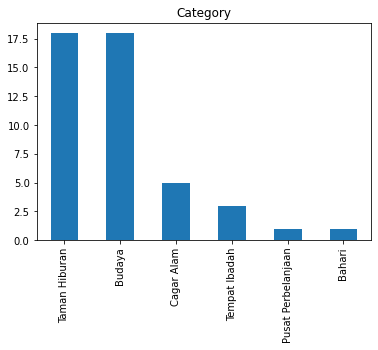

In [27]:
feature = 'Category'
count = preparation[feature].value_counts()
percent = 100*preparation[feature].value_counts(normalize=True)
kategori = pd.DataFrame({'jumlah Sebaran Category Wisata Surabaya':count, 'persentase':percent.round(1)})
print(kategori)
count.plot(kind='bar', title=feature);

In [28]:
from os import pread
id_wisata = preparation['Place_Id'].tolist()
nama_wisata = preparation['Place_Name'].tolist()
kategori_wisata = preparation['Category'].tolist()

print(len(id_wisata))
print(len(nama_wisata))
print(preparation.Category.unique())

46
46
['Cagar Alam' 'Taman Hiburan' 'Budaya' 'Pusat Perbelanjaan'
 'Tempat Ibadah' 'Bahari']


In [29]:
new_wisata = pd.DataFrame({
    'id': id_wisata,
    'nama_wisata': nama_wisata,
    'kategori_wisata': kategori_wisata
})
new_wisata

,id,nama_wisata,kategori_wisata
0,392,Ekowisata Mangrove Wonorejo,Cagar Alam
1,393,Taman Harmoni Keputih,Cagar Alam
2,394,Air Mancur Menari,Taman Hiburan
3,395,Taman Prestasi,Taman Hiburan
4,396,Monumen Kapal Selam,Budaya
5,397,Taman Kunang-Kunang,Taman Hiburan
6,398,Taman Buah Surabaya,Taman Hiburan
7,399,Taman Pelangi,Taman Hiburan
8,400,Hutan Bambu Keputih,Cagar Alam
9,401,Taman Keputran,Taman Hiburan


<h1>Pemodelan Menggunakan Content-Based Filtering</h1>

In [30]:
data = new_wisata
data.sample(5)

,id,nama_wisata,kategori_wisata
11,403,Taman Barunawati,Taman Hiburan
25,417,Klenteng Sanggar Agung,Budaya
41,433,Museum Mpu Tantular,Budaya
1,393,Taman Harmoni Keputih,Cagar Alam
37,429,House of Sampoerna,Budaya


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
 
# Inisialisasi TfidfVectorizer
tf = CountVectorizer() 

tf.fit(data['kategori_wisata']) 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['alam',
 'bahari',
 'budaya',
 'cagar',
 'hiburan',
 'ibadah',
 'perbelanjaan',
 'pusat',
 'taman',
 'tempat']

In [32]:
tfidf_matrix = tf.fit_transform(data['kategori_wisata'])
tfidf_matrix.shape 

(46, 10)

In [33]:
tfidf_matrix.todense()

matrix([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],


In [34]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.nama_wisata
).sample(10, axis=1).sample(10, axis=0)

,pusat,hiburan,bahari,budaya,tempat,alam,perbelanjaan,taman,ibadah,cagar
nama_wisata,,,,,,,,,,
Surabaya Museum (Gedung Siola),0,0,0,1,0,0,0,0,0,0
Taman Prestasi,0,1,0,0,0,0,0,1,0,0
Surabaya North Quay,0,1,0,0,0,0,0,1,0,0
Monumen Jalesveva Jayamahe,0,0,0,1,0,0,0,0,0,0
Taman Flora Bratang Surabaya,0,1,0,0,0,0,0,1,0,0
House of Sampoerna,0,0,0,1,0,0,0,0,0,0
Kebun Bibit Wonorejo,0,0,0,0,0,1,0,0,0,1
Taman Buah Surabaya,0,1,0,0,0,0,0,1,0,0
Keraton Surabaya,0,0,0,1,0,0,0,0,0,0


Menghitung Consine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['nama_wisata'], columns=data['nama_wisata'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (46, 46)


nama_wisata,Kebun Bibit Wonorejo,Masjid Nasional Al-Akbar,Atlantis Land Surabaya,Taman Barunawati,Masjid Muhammad Cheng Hoo
nama_wisata,,,,,
Taman Kunang-Kunang,0.0,0.0,1.0,1.0,0.0
Surabaya North Quay,0.0,0.0,1.0,1.0,0.0
Food Junction Grand Pakuwon,0.0,0.0,0.0,0.0,0.0
Museum TNI AL Loka Jala Crana,0.0,0.0,0.0,0.0,0.0
Ekowisata Mangrove Wonorejo,1.0,0.0,0.0,0.0,0.0
Taman Keputran,0.0,0.0,1.0,1.0,0.0
Taman Mundu,0.0,0.0,1.0,1.0,0.0
Atlantis Land Surabaya,0.0,0.0,1.0,1.0,0.0
Taman Prestasi,0.0,0.0,1.0,1.0,0.0


In [37]:
def resto_recommendations(wisata_nama, similarity_data=cosine_sim_df, items=data[['nama_wisata', 'kategori_wisata']], k=5):
    index = similarity_data.loc[:,wisata_nama].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]    
    closest = closest.drop(wisata_nama, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [38]:
data[data.nama_wisata.eq('Taman Harmoni Keputih')]

,id,nama_wisata,kategori_wisata
1,393,Taman Harmoni Keputih,Cagar Alam


In [39]:
resto_recommendations('Taman Harmoni Keputih')

,nama_wisata,kategori_wisata
0,Ekowisata Mangrove Wonorejo,Cagar Alam
1,Kebun Binatang Surabaya,Cagar Alam
2,Hutan Bambu Keputih,Cagar Alam
3,Kebun Bibit Wonorejo,Cagar Alam
4,Taman Buah Surabaya,Taman Hiburan


<h1>Pemodelan Colaborative Filtering</h1>

In [40]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
df = rating_wisata_surabaya
df

,User_Id,Place_Id,Place_Ratings
0,25,392,4
1,44,392,3
2,108,392,5
3,119,392,3
4,125,392,5
...,...,...,...
1045,284,437,5
1046,288,437,1
1047,288,437,4
1048,297,437,4


In [42]:
user_ids = df['User_Id'].unique().tolist()
print('list userID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [25, 44, 108, 119, 125, 132, 133, 135, 151, 179, 182, 224, 232, 251, 297, 298, 1, 6, 8, 19, 27, 59, 69, 73, 82, 104, 120, 131, 137, 174, 180, 184, 255, 261, 271, 43, 65, 83, 97, 99, 149, 154, 159, 188, 210, 217, 267, 286, 5, 35, 46, 49, 79, 106, 129, 178, 193, 209, 216, 220, 237, 256, 262, 14, 37, 41, 68, 121, 128, 155, 175, 176, 203, 226, 230, 235, 265, 272, 28, 29, 31, 40, 74, 140, 202, 258, 268, 276, 287, 291, 300, 13, 17, 23, 53, 58, 85, 102, 160, 166, 170, 190, 191, 196, 198, 257, 259, 285, 18, 61, 100, 141, 185, 187, 195, 212, 221, 245, 293, 30, 72, 94, 103, 116, 118, 146, 147, 150, 157, 167, 183, 206, 266, 283, 38, 50, 62, 78, 90, 107, 113, 136, 142, 152, 199, 200, 213, 228, 246, 253, 9, 12, 32, 63, 64, 71, 76, 84, 89, 96, 126, 144, 173, 186, 225, 234, 264, 279, 299, 47, 88, 192, 274, 277, 295, 20, 98, 122, 194, 270, 280, 282, 292, 10, 91, 92, 163, 204, 239, 243, 278, 4, 11, 26, 48, 55, 172, 218, 296, 2, 66, 156, 169, 171, 189, 288, 39, 67, 109, 177, 181, 250, 263,

In [43]:
wisata_id = df['Place_Id'].unique().tolist()
 
wisata_to_wisata_encoded = {x: i for i, x in enumerate(wisata_id)}
 
wisata_encoded_to_wisata = {i: x for i, x in enumerate(wisata_id)}

In [44]:
df['user'] = df['User_Id'].map(user_to_user_encoded)
 
df['wisata'] = df['Place_Id'].map(wisata_to_wisata_encoded)

In [45]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_wisata = len(wisata_to_wisata_encoded)
print(num_wisata)
 
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
min_rating = min(df['Place_Ratings'])
 
max_rating = max(df['Place_Ratings'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_wisata, min_rating, max_rating
))

293
46
Number of User: 293, Number of Resto: 46, Min Rating: 1.0, Max Rating: 5.0


In [46]:
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,wisata
352,268,407,2.0,86,15
689,75,423,1.0,281,31
485,46,414,5.0,50,22
388,160,409,2.0,98,17
31,180,393,3.0,30,1
...,...,...,...,...,...
330,262,406,1.0,62,14
466,118,413,2.0,124,21
121,53,398,3.0,94,6
1044,284,437,1.0,226,45


In [47]:
x = df[['user', 'wisata']].values
 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 86  15]
 [281  31]
 [ 50  22]
 ...
 [ 94   6]
 [226  45]
 [ 52  38]] [0.25 0.   1.   ... 0.5  0.   0.5 ]


In [48]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_wisata, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_wisata = num_wisata
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.wisata_embedding = layers.Embedding( # layer embeddings resto
        num_wisata,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.wisata_bias = layers.Embedding(num_wisata, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    wisata_vector = self.wisata_embedding(inputs[:, 1]) # memanggil layer embedding 3
    wisata_bias = self.wisata_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_wisata = tf.tensordot(user_vector, wisata_vector, 2) 
 
    x = dot_user_wisata + user_bias + wisata_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [49]:
model = RecommenderNet(num_users, num_wisata, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [50]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
105/105 [==============================] - 2s 5ms/step - loss: 0.7093 - root_mean_squared_error: 0.3579 - val_loss: 0.7021 - val_root_mean_squared_error: 0.3562
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.7016 - root_mean_squared_error: 0.3526 - val_loss: 0.6988 - val_root_mean_squared_error: 0.3540
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6957 - root_mean_squared_error: 0.3483 - val_loss: 0.7001 - val_root_mean_squared_error: 0.3549
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6851 - root_mean_squared_error: 0.3410 - val_loss: 0.6997 - val_root_mean_squared_error: 0.3546
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6755 - root_mean_squared_error: 0.3341 - val_loss: 0.6960 - val_root_mean_squared_error: 0.3520
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6771 - root_mean_squared_error: 0.3352 - val_loss: 0.6966 

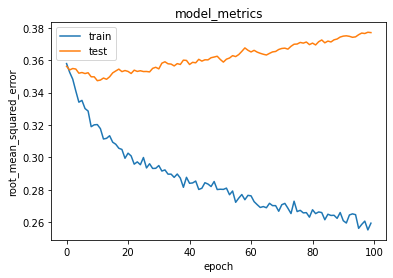

In [51]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
wisata_df = new_wisata
df = rating_wisata_surabaya
 
user_id = df.User_Id.sample(1).iloc[0]
wisata_visited_by_user = df[df.User_Id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
wisata_not_visited = wisata_df[~wisata_df['id'].isin(wisata_visited_by_user.Place_Id.values)]['id'] 
wisata_not_visited = list(
    set(wisata_not_visited)
    .intersection(set(wisata_to_wisata_encoded.keys()))
)
 
wisata_not_visited = [[wisata_to_wisata_encoded.get(x)] for x in wisata_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_wisata_array = np.hstack(
    ([[user_encoder]] * len(wisata_not_visited), wisata_not_visited)
)

In [53]:
ratings = model.predict(user_wisata_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_wisata_ids = [
    wisata_encoded_to_wisata.get(wisata_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Menampilkan Rekomendasi wisata untuk users: {}'.format(user_id))
print('===' * 9)
print('Wisata dengan rating tertinggi dari user')
print('----' * 8)
 
top_wisata_user = (
    wisata_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
wisata_df_rows = wisata_df[wisata_df['id'].isin(top_wisata_user)]
for row in wisata_df_rows.itertuples():
    print(row.nama_wisata, ':', row.kategori_wisata)
 
print('----' * 8)
print('10 rekomendasi destinasi wisata surabaya')
print('----' * 8)
 
recommended_wisata = wisata_df[wisata_df['id'].isin(recommended_wisata_ids)]
for row in recommended_wisata.itertuples():
    print(row.nama_wisata, ':', row.kategori_wisata)

Menampilkan Rekomendasi wisata untuk users: 74
Wisata dengan rating tertinggi dari user
--------------------------------
Taman Kunang-Kunang : Taman Hiburan
Taman Buah Surabaya : Taman Hiburan
Jembatan Merah : Budaya
Monumen Tugu Pahlawan : Budaya
Taman Bungkul : Taman Hiburan
--------------------------------
10 rekomendasi destinasi wisata surabaya
--------------------------------
Taman Prestasi : Taman Hiburan
Monumen Kapal Selam : Budaya
Taman Pelangi : Taman Hiburan
Taman Keputran : Taman Hiburan
Taman Ekspresi Dan Perpustakaan : Taman Hiburan
Masjid Nasional Al-Akbar : Tempat Ibadah
Keraton Surabaya : Budaya
Waterpark Kenjeran Surabaya : Taman Hiburan
Monumen Bambu Runcing Surabaya : Budaya
House of Sampoerna : Budaya
